In [1]:
!pip install np_utils
!pip install nltk
!pip install langdetect
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=0113656d0adc1bff78206f94375b344dc868cd55cd11a0794d7db246298121ab
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=2304aab510a91de5379ea085b3386ace3d764e9ecdca5854a8cba94a10a428a0
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.path import Path

import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords, wordnet
from wordcloud import WordCloud
from langdetect import detect
from nltk.tokenize import sent_tokenize, word_tokenize
import regex as re

import np_utils

import tensorflow as tf
import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU,ELU, ReLU, Dropout
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras import models

from sklearn.model_selection import train_test_split
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/tcc_ceds_music.csv')
df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64
 14  commun

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

## EDA

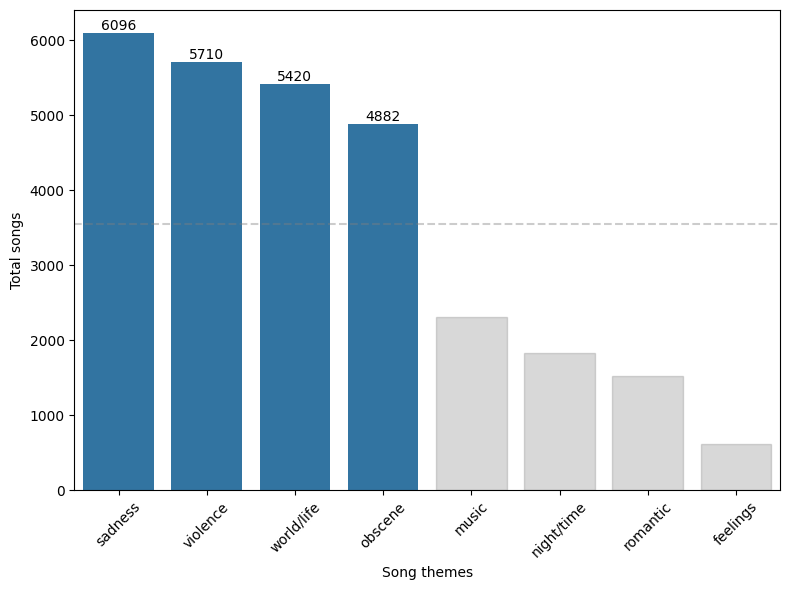

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
g = sns.countplot(data=df, x='topic', order=df['topic'].value_counts().index)

plt.xlabel('Song themes')
plt.ylabel('Total songs')


mean =df['topic'].value_counts().mean()

# adding mean horizontal line
g.axhline(y = mean, alpha = 0.4,c='gray',linestyle='--',label='mean')


# ignoring color for lower last four bars
for i, bar in enumerate(g.patches):
    if i >= 4:  # Excluding top four bars
        bar.set_color('gray')
        bar.set_alpha(0.3)
    if i < 4:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')


# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

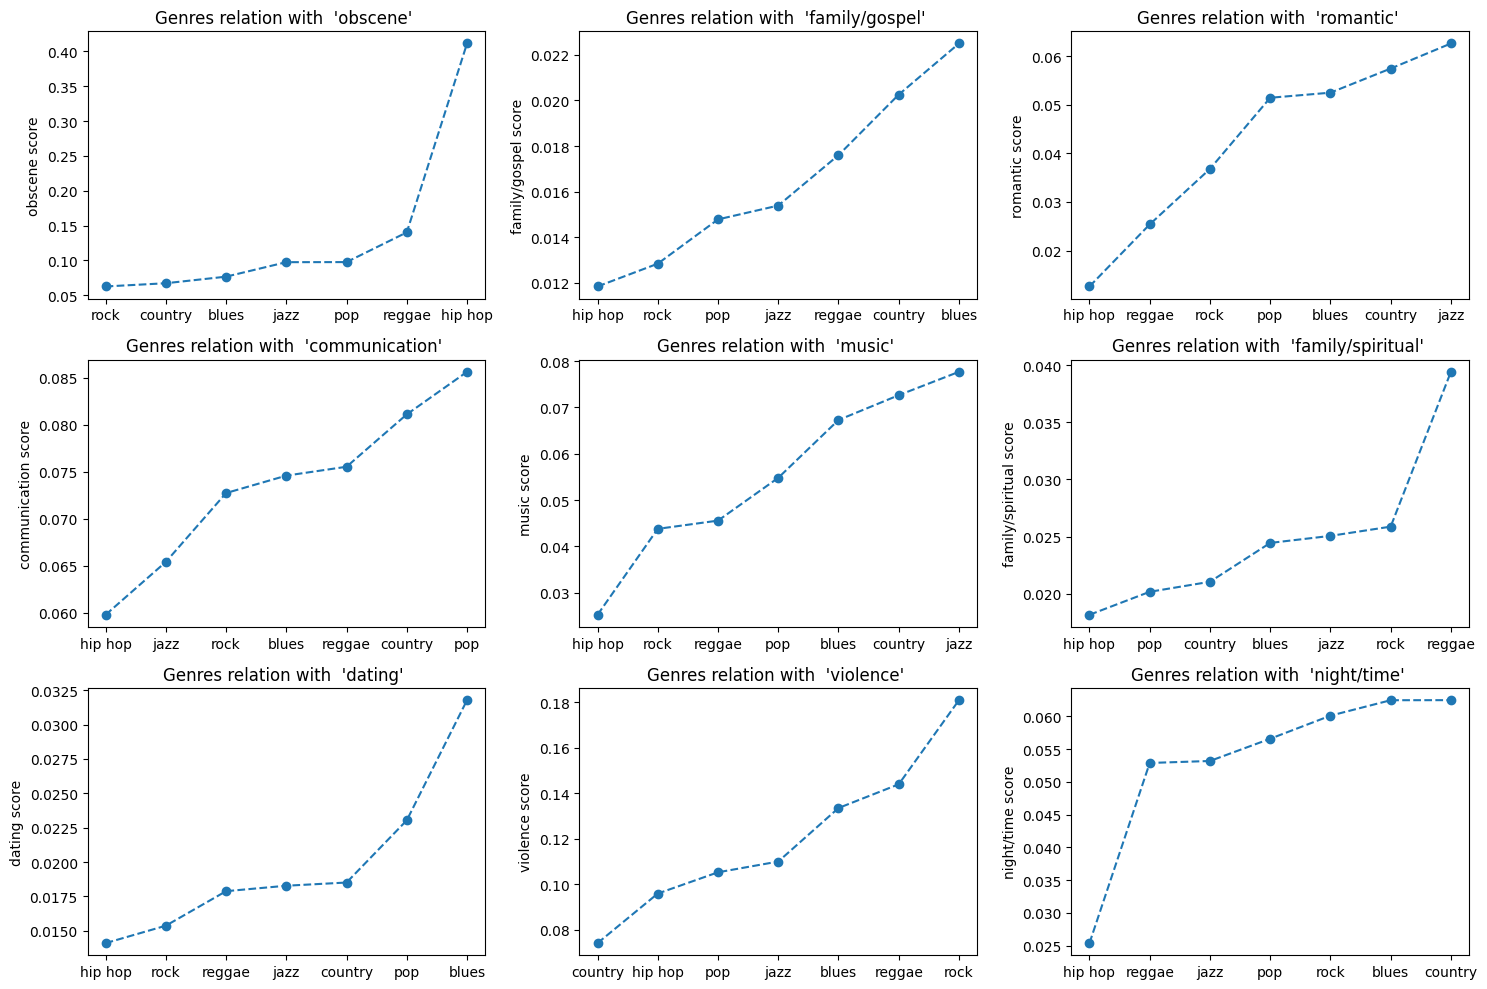

In [7]:
fig, axes = plt.subplots(3,3, figsize=(15,10))
types = ['obscene', 'family/gospel','romantic','communication','music','family/spiritual','dating','violence','night/time']
df_range = df.copy()

for i,feature in enumerate(types):
    row , col = i//3 , i%3
    genre = df_range.groupby('genre')[feature].mean().sort_values().index
    values = df_range.groupby('genre')[feature].mean().sort_values().values
    axes[row,col].plot(genre, values,marker='o', linestyle='--')
    axes[row,col].set_title("Genres relation with  '{}' ".format(feature))
    axes[row,col].set_ylabel('{} score'.format(feature))
plt.tight_layout()

<Axes: >

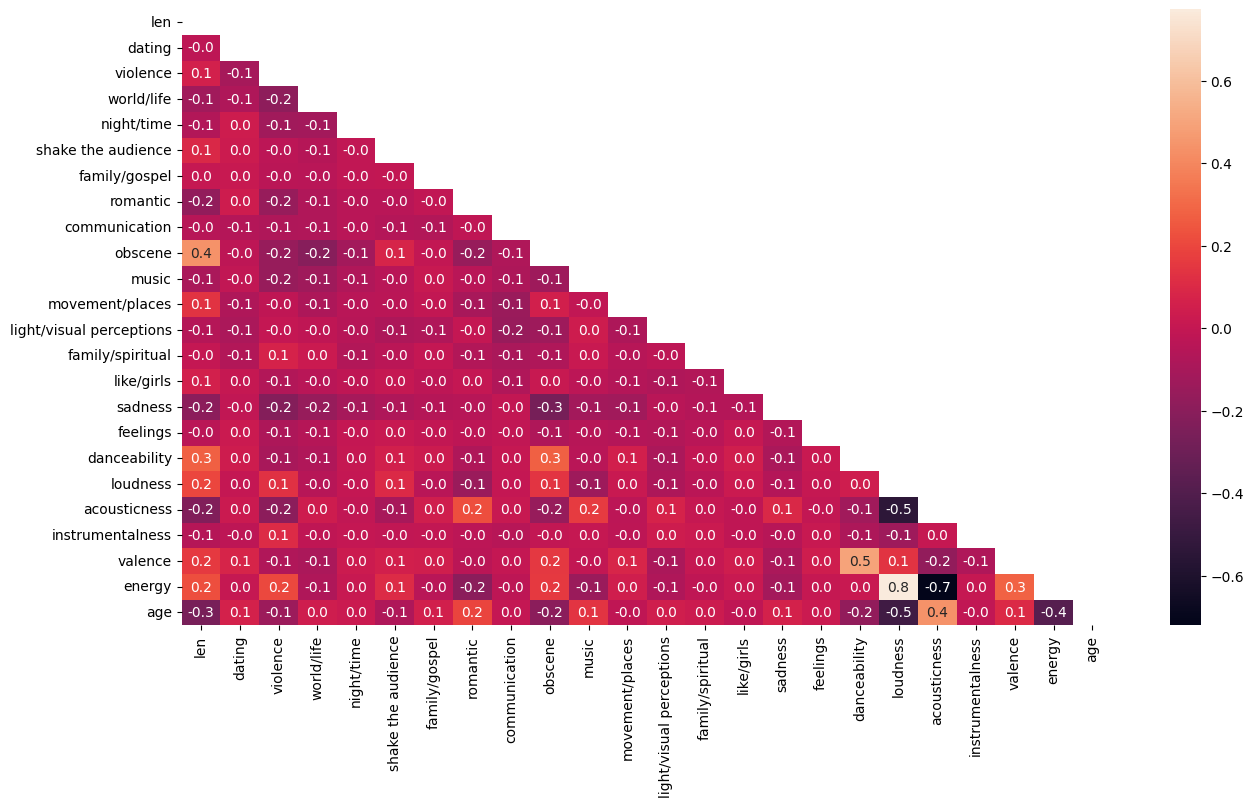

In [8]:
#Extracting only numerical features for correlation
X_numeric=df_range.iloc[:,5:30]
X_numeric = X_numeric.drop('topic',axis=1)

#compute the correlation matrix
numeric_corr = X_numeric.corr()

#Generatae a mask for upper triangle
mask = np.triu(np.ones_like(numeric_corr, dtype=bool))

#increase figisze
figure, ax = plt.subplots(figsize=(15,8))
sns.heatmap(
data = numeric_corr, mask = mask, annot=True, fmt='0.1f')

## Data Cleaning

In [9]:
def expand_contractions_filter_1(text):
    contractions = {
    r"won't": "will not",
    r"can't": "can not",
    r"n't": " not",
    r"'re": " are",
    r"'s": " is",
    r"'d": " would",
    r"'ll": " will",
    r"'ve": " have"
  }
    for pattern, replacement in contractions.items():
        text = re.sub(pattern, replacement, text)
    return text

In [10]:
import nltk

# Download the stopwords dataset
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

print(stop_words)


{"wouldn't", 's', 'all', 'should', "hasn't", 'about', 'most', "she's", 'do', 'they', 'did', 're', 'aren', 't', 'below', 'while', "it's", 'same', 'me', "weren't", 'myself', 'above', 'between', "mightn't", 'd', 'was', 'hasn', 'him', 'hers', 'any', 'ours', 'now', 'ain', "shouldn't", 'we', 'than', 'of', 'a', 'our', 'being', 'because', 'theirs', 'yourselves', 'how', 'mustn', 'nor', 'by', 'yourself', 'them', 'more', "couldn't", 'be', 'why', 'after', 've', 'shouldn', 'before', "you'd", 'didn', 'an', 'just', "haven't", 'doing', 'herself', 'up', 'were', 'off', 'with', "isn't", 'through', 'during', 'there', "wasn't", 'no', 'wasn', "won't", 'whom', 'doesn', 'shan', 'it', 'having', 'not', 'her', 'she', 'll', 'has', 'who', 'to', 'both', 'only', 'here', 'or', 'itself', 'couldn', 'hadn', 'my', 'isn', 'for', 'y', 'over', 'once', "that'll", 'other', 'he', 'needn', 'you', 'what', 'i', 'weren', 'that', 'himself', 'which', "you'll", 'further', 'where', 'in', 'such', 'from', 'until', "doesn't", 'this', 'wh

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
#removes [^A-Za-z0-9] removes the part that matches any character other than
#removes stop_words
text_cleaning = "\b0\S*|\b[^A-Za-z0-9]+"
stop_words = stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer

def preprocess_filter_2(text, stem=False):
  text = re.sub(text_cleaning, " ",str(text.lower()).strip())
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        stemmer = SnowballStemmer(language='english')
        token = stemmer.stem(token)
      tokens.append(token)
  return " ".join(tokens)

In [12]:
print(preprocess_filter_2(df_range['lyrics'][0], stem=True))

hold time feel break feel untru convinc speak voic tear tri hold hurt tri forgiv okay play break string feel heart want feel tell real truth hurt lie wors anymor littl turn dust play hous ruin run leav save like chase train late late tear tri hold hurt tri forgiv okay play break string feel heart want feel tell real truth hurt lie wors anymor littl run leav save like chase train know late late play break string feel heart want feel tell real truth hurt lie wors anymor littl know littl hold time feel


In [13]:
print(preprocess_filter_2(df_range['lyrics'][0], stem=False))

hold time feel break feel untrue convince speak voice tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little turn dust play house ruin run leave save like chase train late late tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little run leave save like chase train know late late play break string feel heart want feel tell real truth hurt lie worse anymore little know little hold time feel


In [14]:
def remove_repeated_character_filter_3(text):
    filtered_word = []
    tokens= word_tokenize(text)
    def stop_repeating(old_word):
        repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
        match_substitution = r'\1\2\3'
        step = 1
        while True:
            new_word = repeat_pattern.sub(match_substitution,old_word)
            if new_word != old_word:
                step+=1
                # change old_word with last substituted stage
                old_word = new_word
                continue
            else:
                return new_word
    for token in tokens:
        filtered_word.append(stop_repeating(token))
    return " ".join(filtered_word)

In [15]:
# Extracting out sample

def take_out_your_sample_filter_4(df, rows:int,sample=True):
    if sample:
        sampler = np.random.permutation(rows)
        df = df.take(sampler)
        final_df =df.reset_index().drop(['index'], axis=1)
        return final_df
    else:
        return df

In [16]:
def only_english_lyrics_filter_5(df):
    def english_language_filter(text)-> bool:
        try:
            return detect(text) == 'en'
        except:
            return False
    return df.loc[df['lyrics'].apply(english_language_filter)]

In [17]:
def filter_symbols_between_words_filer_6(text):
    pattern = r'(?<=\b\w+)\W+(?=\w+\b)'
    filtered_text = re.sub(pattern, ' ', text)
    return filtered_text